En cas de problème particulier (lors de l'execution d'une cellule), on pourra relancer le noyau jupyter.

Vos réponses (codes ou réponses) doivent être placées entre les balises :`VOTRE CODE ICI` ou "VOTRE REPONSE ICI", N'oubliez pas d'indiquer vos noms et prénoms

In [1]:
NOMS et PRENOMS = "PUILL Guillaume, MOREAU Marius"


SyntaxError: invalid syntax (1630661982.py, line 1)

---

# <p style="text-align: center;"> Projet 1 modélisation  <br> Courbes et sous courbes de Bézier, courbes de Bézier rationnelles
</p>

## <span style="color:red">  **Consignes générales :** </span>
1. Lire attentivement le sujet
2. les structures de données ainsi que  les entrées et sorties des méthodes demandées (et leur type) sont **imposées**. Il ne faut pas les modifier
3. Pour qu'une cellule de code soit prise en compte elle doit être executée.
4. Ne **pas ajouter ou effacer de cellule**. Si, néanmoins, vous ajoutez  une cellule pour des tests, il faudra la supprimer avant de déposer votre notebook. Il est cependant préférable de faire vos test sur un autre notebook (ou ide, etc).
5. Si vous faites une modification dans une cellule, il faut "l'executer" pour qu'elle soit prise en compte.
6. Des tests de validation de certaines méthodes sont proposés, il est nécessaire de les passer mais pas suffisant !
7. Vous pouvez utiliser, en les adaptant,  les  méthodes obtenues durant les séances de tp.
8. Dans la cellule ci-dessous, vous pouvez ajouter les fonctions des tp précédents et dont vous avez besoin (**Bernstein**, etc).
9. Enfin lors du dépot sur moodle, **ne pas modifier le nom du fichier.**

### <ins> Avec les polynômes de Bernstein </ins>

Pour $n+1$ points de contrôle $(\mathbf{P}_0, \dots, \mathbf{P}_n)$, on définit la courbe de Bézier   
$$\sum_{i=0}^n B_i^n(t)\mathbf{P}_i, \quad t \in[0,1] $$ 
où les $B_i^n$ sont les polynômes de Bernstein.  
La suite des points $\mathbf{P}_0, \dots, \mathbf{P}_n$ forme le polygone de contrôle.  
Les $n+1$ polynômes de Bernstein sont donnés par
$$
B_i^n(u) = \begin{pmatrix} n \\ i \end{pmatrix} u^i \left( 1-u \right)^{n-i} $$

Ecrire une fonction qui calcule le polynôme de Bernstein $B_i^n(t)$ pour $p$ valeurs de $t$  
On pourra obtenir les coefficients binomiaux on utilisant le module **math**, par exemple pour $\begin{pmatrix} n \\ i \end{pmatrix}$, on écrira 
```python
from math import comb
comb(n,i)
```

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from math import comb,pi

def onclick(event):
    PtContX.append(event.xdata)
    PtContY.append(event.ydata)
    if event.button ==3:
        ax1.plot(PtContX,PtContY,'ro--')    
        plt.disconnect(cid)
        

    ax1.plot(PtContX,PtContY,'ro--') 


def Bernstein(n,k,t):
    return comb(n, k) * (t ** k) * ((1 - t) ** (n - k))

### Partition de l'unité
Tracer sur une même figure les  polynômes  de Bernstein $ B_i^n, \; 0 \leq i \leq n $, puis tracer, sur la même figure leur somme $S= \sum_{i=0}^n  B_i^n$.  

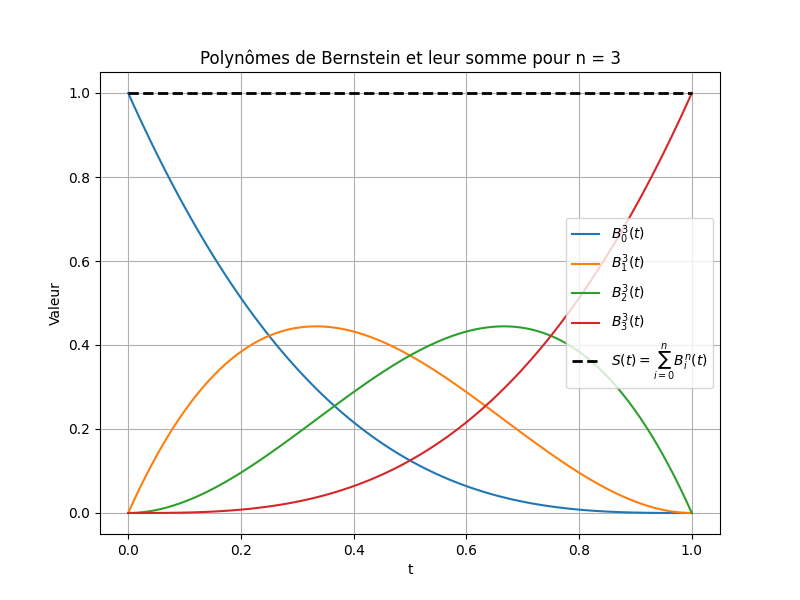

In [2]:
def partition_unit(n):
    """ On vérifie graphiquement que les polynômes de Bernstein
        de degré n forment une partition de l'unité """
    t = np.linspace(0, 1, 100)
    sommeB = np.zeros_like(t)  #pour faire la somme
    
    plt.figure(figsize=(8, 6))
    
    #polynome de bernstein
    for i in range(n + 1):
        bernstein_poly = Bernstein(n, i, t)
        sommeB += bernstein_poly
        plt.plot(t, bernstein_poly, label=f'$B_{i}^{n}(t)$')
    
    #afficher le res
    plt.plot(t, sommeB, 'k--', linewidth=2, label=r'$S(t) = \sum_{i=0}^{n} B_i^n(t)$')
    
    plt.xlabel('t')
    plt.ylabel('Valeur')
    plt.title(f'Polynômes de Bernstein et leur somme pour n = {n}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
partition_unit(3)

YOUR ANSWER HERE

Ecrire une fonction qui calcule en $p$ valeurs de $t$ (par défaut 200 valeurs uniformément répartis entre 0 et 1) la courbe de Bézier,  $ {\cal B}^{n}$.
Les points de contrôle sont passés en paramètres sous  la forme d'un array numpy.

In [3]:
def Bezier(points, num=200):
    """Courbe de Bézier associée aux points de contrôle
       passés en paramètre d'entrée.
       
       return: tuple avec les coordonnées x et y de la courbe de Bézier.
    """
    n = points.shape[1] - 1  # Le degré du polynôme (nombre de colonnes - 1)
    t = np.linspace(0, 1, num)
    bezier_x = np.zeros_like(t)
    bezier_y = np.zeros_like(t)
    
    for i in range(n + 1):
        bernstein_poly = Bernstein(n, i, t)
        bezier_x += bernstein_poly * points[0, i] #coord X
        bezier_y += bernstein_poly * points[1, i] #coord y
    
    return bezier_x, bezier_y

Enfin, tracer sur la **même fenêtre graphique** d'un coté la courbe de Bézier correspondant à des points de contrôle obtenus à la souris, et d'un autre coté les polynômes de Bernstein associés (leur nombre dépendra donc du nombre de points de contrôle).  
On utilisera pour cela `subplot` :
```python
fig = plt.figure()        # On crée la fenêtre graphique
ax = fig.add_subplot(121) # On crée la sous-figure  
ax.set_xlim([0, 5])       # On fixe la taille de la sous-figure
ax.set_ylim([0, 5])       # pour éviter son reimensionnement après 
                          # les clics de souris
```

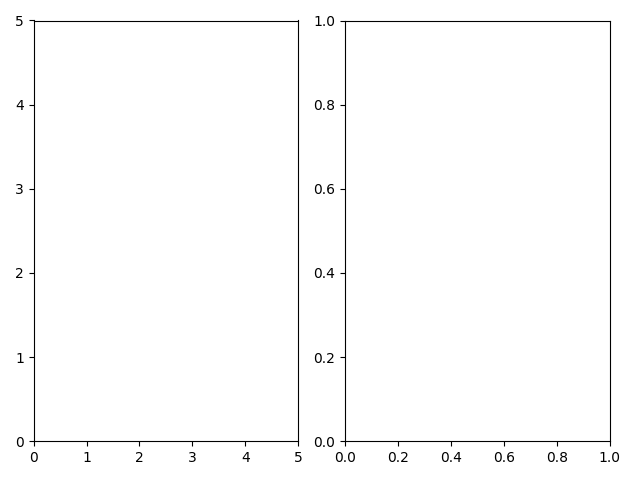

In [17]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.4)
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])
PtContX=[]
PtContY=[]
cid = fig.canvas.mpl_connect('button_press_event', onclick)
""" Attention on ne fait que l'acquisition des points dans cette cellule
    les courbes s'obtiennent en exécutant la cellule suivante.
    Ce n'est pas très intuitif, d'où la remarque ci-dessous (modification de
    la fonction onclick).
    Laissé à l'appréciation de l'étudiant.
"""     
plt.tight_layout()
plt.show() #afficher pour récupérer les points

In [18]:
""" Remarque : on peut également modifier la fonction onclick et ajouter les commandes
ci-dessous lors du clic droit (après la déconnexion à la figure : plt.disconnect).
On obtiendra alors le tracé des courbes juste après le dernier clic. 
"""

#calcul et affiche la courbes suite au inputs des points avec onclick
N=len(PtContX)
c=Bezier(np.array([PtContX,PtContY])) 

# Tracé de la courbe de Bézier
ax1.plot(c[0], c[1], 'b-', linewidth=2, label='Courbe de Bézier')
ax1.plot(PtContX, PtContY, 'ro--', label='Points de contrôle')
ax1.legend()

# Tracé des polynômes de Bernstein associés
t = np.linspace(0, 1, 200)
sum_bernstein = np.zeros_like(t)
for i in range(N + 1):
    bernstein_poly = Bernstein(N, i, t)
    ax2.plot(t, bernstein_poly, label=f'$B_{i}^{N}(t)$')
    sum_bernstein += bernstein_poly

ax2.plot(t, sum_bernstein, 'k--', linewidth=2, label=r'$\sum B_i^n(t) = 1$')
ax2.legend()
ax2.grid(True)


### Sous-courbes de Bézier

On souhaite découper une courbe de Bézier, ${\cal B}^{n}$, de degré $n$ en deux morceaux ${\cal C}^{n}$ et ${\cal D}^{n}$. Chaque morceau sera une courbe de Bézier de même degré $n$.  
La courbe de Bézier ${\cal B}^{n}$ est déterminée par les $n+1$ points de contrôle $P_0, P_1,\ldots,P_n$.  
Soit $B(t_0)$ le point de la courbe de Bézier  ${\cal B}^{n}$ où l'on souhaite ``découper''. On va démontrer **numériquement** que les $n+1$ points de contrôle de chaque morceau sont donnés par l'algorithme de De Casteljau. 

<div>
<img src="Principe_algorithme_de_casteljau.png-1.png" width="420"/>
</div>

Ecrire une fonction  **DeCasteljau(P,t0)**, prenant en paramètres d'entrées $n+1$ points et un scalaire $t_0 \in [0,1]$ et qui renvoie le point $P_{t_0}$  de la courbe de Bézier de paramètre $t_0$

In [19]:
def DeCasteljau(P,t0):
    """P est un array (2,n+1) formé des coordonnées des
        points de contrôle. t0 est le paramètre (scalaire).
        La fonction renvoie le point P0 de la courbe de Bézier correspondant
        au paramètre t0 sous la forme d'un array à deux lignes et une colonne.
    """
    n = P.shape[1] - 1  # Nombre de points de contrôle - 1
    points = P.copy()  # Copie par bonne pratique

    for k in range(1, n + 1):
        for i in range(n - k + 1):
            points[:, i] = (1 - t0) * points[:, i] + t0 * points[:, i + 1] # met à jour les coords des points interpolés.

    P0 = points[:, 0].reshape(2, 1)
    return P0

In [20]:
"""Vérifiez vos résultats sur les tests suivants"""
Px=[1.1129942247944489, 0.8468651925363844, 3.2662200312460614, 4.209768418342835]
Py=[0.3947177903476734, 1.382271902901786, 1.8828130284429112, 0.6517524223823054]

assert all(np.round(DeCasteljau(np.array([Px,Py]),0.3),4) == np.array([[1.4862],[1.1184]]))


Modifier la fonction précédente pour qu'elle renvoie le point $P_{t_0}$  de la courbe de Bézier de paramètre $t_0$ ainsi que deux tableaux numpy, $P_1, P_2$ de $n+1$ points constitués des points intermédiaires qui ont servi au calcul du  point de paramètre $t_0$ par l'algorithme de De Casteljau.  
Le premier tableau, $P_1$, est formé du premier point de contrôle et des **premiers** points de chaque étape de l'algorithme de De Casteljau. Le deuxième, $P_2$ est formé du dernier point de contrôle et des **derniers** points de chaque étape de l'algorithme de De Casteljau mais ordonné dans le sens inverse (voir exemple ci-dessous).  
Reprenons l'exemple de la figure ci-dessus, on obtiendra ainsi
$$ P_1=\{P_0^0, P_0^1, P_0^2,P_0^3  \} \; \text{et} \; P_2=\{P_0^3,P_1^2,P_2^1,P_3^0 \}  $$

In [21]:
def DeCasteljau2(P,t0):
    """P est un array (2,n+1)  formé des coordonnées des
        points de contrôle. t0 est le paramètre.
        La fonction renvoie le point P0 de la courbe de Bézier correspondant
        au paramètre t0 ainsi que les deux array P1 et P2 (coordonnées de points) décrits
        précédemment, chacun de ces tableaux est de dimension (2,n+1).
        On gérera les exceptions avec "raise ValueError()" (si le paramètre t0 n'appartient pas à ]0;1[)
    """
    # P0 est le point de césure
    # P1 est la partie 'gauche' (avant la ceisure) de la courbe
    # P2 est la partie 'droite (après la ceisure) de la courbe
    
    n = P.shape[1] - 1
    P1,P2 = np.zeros((2, n + 1)), np.zeros((2, n + 1))  # Initialisation des points P1 et P2
    
    P_temp = P.copy()           # Tableau temporaire pour les calculs

    P1[:, 0] = P[:, 0]         # Premier point de P1
    P2[:, 0] = P[:, n]         # Dernier point de P2
    for k in range(0, n + 1):
        P1[:, k] = P_temp[:, 0]  # Stocke le premier point de chaque étape
        P2[:, k] = P_temp[:, n - k]  # Stocke le dernier point de chaque étape
        for i in range(n - k):
            P_temp[:, i] = (1 - t0) * P_temp[:, i] + t0 * P_temp[:, i + 1]
    
    P0 = P_temp[:, 0].reshape(2, 1)
    P2 = np.flip(P2[:, :k + 1], axis=1)  # Inverse l'ordre des points dans P2
    return P0, P1, P2

In [22]:
"""Vérifiez vos résultats sur les tests suivants"""

#print(np.round(DeCasteljau2(np.array([Px,Py]),0.3)[1],4)) # j'ai l'impression que je duplique la première donnée, mais j'ai pas capté comment

np.all(np.round(DeCasteljau2(np.array([Px,Py]),0.3)[0],4) == np.array([[1.4862],[1.1184]]))
np.all(np.round(DeCasteljau2(np.array([Px,Py]),0.3)[1],4) == np.array([[1.1130, 1.0332, 1.1950, 1.4862],[0.3947,0.691 , 0.9434, 1.1184]]))

np.True_

Dans cette dernière partie, on souhaite faire l'acquisition des points de contrôle à la souris, les représenter sur la figure (ainsi que le polygône de contrôle correspondant) puis tracer sur la même figure la courbes de Bézier associée à ces points ainsi  que les deux sous courbes de Bézier associées (l'utisateur choisira le paramètre de coupure t0).  
Vous devriez, au final, avoir une figure semblable à celle ci-dessous.

<div>
<img src="SousCourbes.png" width="520"/>
</div>

In [ ]:
# Acquisition des points de contrôle
# Votre code ici

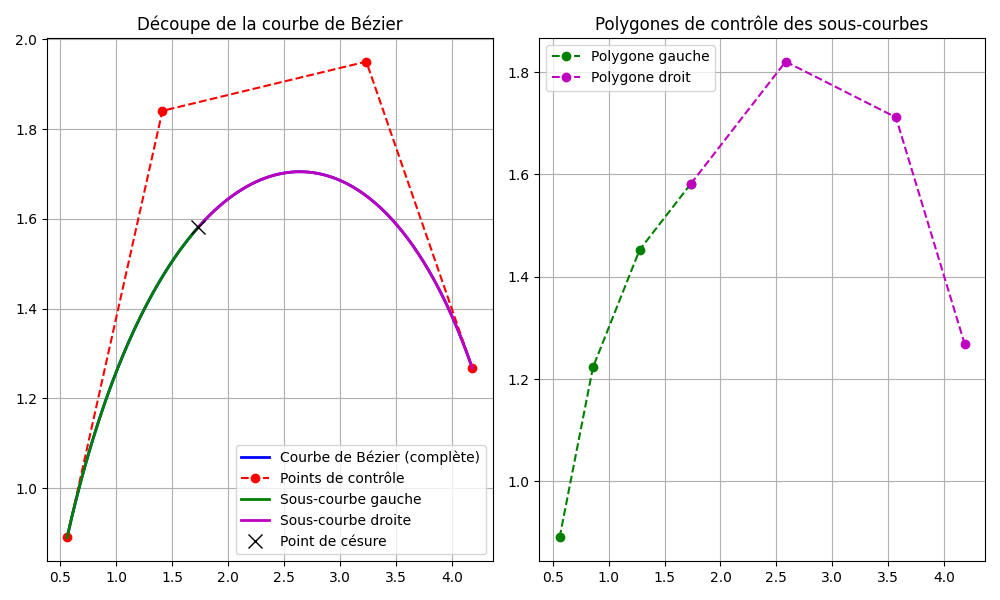

In [23]:
def SousCourbes(PtContX, PtContY, t0):
    """ Les coordonnées des points de contrôle sont donnés par les listes PtContX et PtContY.
    Le paramètre du point de découpe est t0.
    Toutes les directives de tracé se font dans cette fonction, elle ne retourne donc rien. On l'appelle pour effectuer 
    les tracés.
    """

    # Convertir les listes en tableau numpy pour faciliter les calculs
    P = np.array([PtContX, PtContY])

    # Vérification de t0
    if not (0 < t0 < 1):
        raise ValueError("Le paramètre t0 doit être strictement compris entre 0 et 1.")

    # Obtenir le point de découpe, les sous-courbes P1 (gauche) et P2 (droite)
    P0, P1, P2 = DeCasteljau2(P, t0)

    # Tracer les points de contrôle et la courbe de Bézier initiale
    plt.figure(figsize=(10, 6))

    # Sous-figure 1 : Courbe complète et sous-courbes
    plt.subplot(1, 2, 1)
    c_x, c_y = Bezier(P)  # Courbe de Bézier initiale
    plt.plot(c_x, c_y, 'b-', linewidth=2, label='Courbe de Bézier (complète)')
    plt.plot(PtContX, PtContY, 'ro--', label='Points de contrôle')

    # Tracer la sous-courbe gauche
    c1_x, c1_y = Bezier(P1[:, :P1.shape[1]])
    plt.plot(c1_x, c1_y, 'g-', linewidth=2, label='Sous-courbe gauche')

    # Tracer la sous-courbe droite
    c2_x, c2_y = Bezier(P2[:, :P2.shape[1]])
    plt.plot(c2_x, c2_y, 'm-', linewidth=2, label='Sous-courbe droite')

    # Tracer le point de césure
    plt.plot(P0[0, 0], P0[1, 0], 'kx', markersize=10, label='Point de césure')

    plt.title('Découpe de la courbe de Bézier')
    plt.legend()
    plt.grid(True)

    # Sous-figure 2 : Polygones de contrôle des sous-courbes
    plt.subplot(1, 2, 2)
    plt.plot(P1[0, :], P1[1, :], 'go--', label='Polygone gauche')
    plt.plot(P2[0, :], P2[1, :], 'mo--', label='Polygone droit')

    plt.title('Polygones de contrôle des sous-courbes')
    plt.legend()
    plt.grid(True)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
SousCourbes(PtContX, PtContY, 0.35)


### Bézier rationnelles
  

Dans cette partie on s'interesse aux courbes de Bézier rationnelles, $ {\cal B}^{n}$.  
L'idée est d'ajouter des poids, $\omega_i$, aux points de contrôle $P_i$.  

Pour $n+1$ points de contrôle $(\mathbf{P}_0, \dots, \mathbf{P}_n)$, et $n+1$ poids $\omega_i, i\in\{0,\ldots,n\}$ **non tous nuls**, on définit la courbe de Bézier rationnelle  
$$B_r(t)=\displaystyle \frac{\displaystyle\sum_{i=0}^n B_i^n(t) \omega_i \mathbf{P}_i }{\displaystyle\sum_{i=0}^n B_i^n(t) \omega_i } , \quad t \in[0,1] $$  
où les $B_i^n$ sont les polynômes de Bernstein et la suite des points $\mathbf{P}_0, \dots, \mathbf{P}_n$ forme le polygone de contrôle.

Que se passe t'il si tous les poids sont égaux, quelle courbe obtient-on ?  
Justifiez brièvement (mais clairement) votre réponse dans la cellule ci-dessus.

YOUR ANSWER HERE

Ecrire une fonction qui prend en paramètre d'entrée les points de contrôle (sous forme d'un **tableau numpy** à 2 lignes et n+1 colonnes, une **liste** de n+1 poids ainsi qu'un paramètre $t \in [0,1]$ et qui renvoie le point de la courbe de Bézier rationnelle correspondant à $t$.   

In [28]:
def BezierRat(Pc, L, t):
   """Courbe de Bézier rationnelle associée aux points de contrôle Pc
      passés en paramètre d'entrée, une liste L de poids et un
      paramètre t.
      La fonction renvoie le point Pt de la courbe correpondant au paramètre t.
      On gérera une exception si tous les poids sont nuls (raise ValueError()).
   """

   # Conversion des points de contrôle et des poids en tableaux numpy
   Pc = np.array(Pc)  # Tableau 2D (2, n+1) ou (3, n+1) pour les points homogènes
   L = np.array(L)    # Tableau 1D des poids

   # Vérification des poids
   if np.all(L == 0):
      raise ValueError("Tous les poids sont nuls. Impossible de calculer la courbe de Bézier rationnelle.")

   # Nombre de points de contrôle
   n = Pc.shape[1] - 1

   # Calcul des coordonnées pondérées
   numerateur = np.zeros(Pc.shape[0])  # Somme pondérée des coordonnées des points
   denominateur = 0  # Somme pondérée des poids

   for i in range(n + 1):
      bernstein_poly = Bernstein(n, i, t)
      numerateur += bernstein_poly * L[i] * Pc[:, i]
      denominateur += bernstein_poly * L[i]

   # Si le denominateur est nul, lever une exception pour eviter une division par zero
   if denominateur == 0:
      raise ValueError("La somme des poids pondérés est nulle. Impossible de calculer le point.")

   # Calcul du point rationnel
   Pt = numerateur / denominateur

   return Pt


In [29]:
"""Vérifiez vos résultats sur les tests suivants"""
np.all(np.round(BezierRat(np.array([Px,Py]),[4,4,4,4],0.5),4)==np.array([[2.2078],[1.3552]]))


np.False_

Modifier la fonction précédente pour pouvoir passer un vecteur de paramètres (t = np.linspace(0,1,100) par exemple). 

In [34]:
def BezierRatVect(Pc, L, t):
   """Courbe de Bézier rationnelle associée aux points de contrôle Pc
      passés en paramètre d'entrée, une liste L de poids et un vecteur
      de paramètre t.
      La fonction renvoie les points Pts de la courbe correpondant aux paramètres t.
      On gérera une exception si tous les poids sont nuls (raise ValueError()).
   """

   # Conversion des points de contrôle et des poids en tableaux numpy
   Pc = np.array(Pc)  # Tableau 2D (2, n+1) ou (3, n+1) pour les points homogènes
   L = np.array(L)    # Tableau 1D des poids

   # Vérification des poids
   if np.all(L == 0):
      raise ValueError("Tous les poids sont nuls. Impossible de calculer la courbe de Bézier rationnelle.")

   # Nombre de points de contrôle
   n = Pc.shape[1] - 1

   # Initialisation des coordonnées pondérées pour tous les t
   Pts = np.zeros((Pc.shape[0], len(t)))

   for j, t_val in enumerate(t):
      numerateur = np.zeros(Pc.shape[0])  # Somme pondérée des coordonnées des points
      denominateur = 0  # Somme pondérée des poids

      for i in range(n + 1):
         bernstein_poly = Bernstein(n, i, t_val)
         numerateur += bernstein_poly * L[i] * Pc[:, i]
         denominateur += bernstein_poly * L[i]

      # Si le denominateur est nul, lever une exception pour eviter une division par zero
      if denominateur == 0:
         raise ValueError(f"La somme des poids pondérés est nulle pour t = {t_val}. Impossible de calculer le point.")

      # Calcul du point rationnel
      Pts[:, j] = numerateur / denominateur

   return Pts


In [35]:
"""Vérifiez vos résultats sur les tests suivants"""
np.all(np.round(BezierRatVect(np.array([Px,Py]),[4,4,4,4],np.linspace(0,1,6)),4)==np.array([[1.113 , 1.2423, 1.8163, 2.6354, 3.4998, 4.2098],
[0.3947, 0.9189, 1.2664, 1.3775, 1.1926, 0.6518]]))


np.True_

Ecrire une fonction qui prend comme paramètre d'entrée les points de contrôle (sous forme d'un tableau numpy) ainsi qu'une liste, L,  de poids et qui trace sur une même figure les points de contrôle, le polygone de contrôle et la courbe de Bézier rationnelle (cubique) associée à ces points et ces poids. 

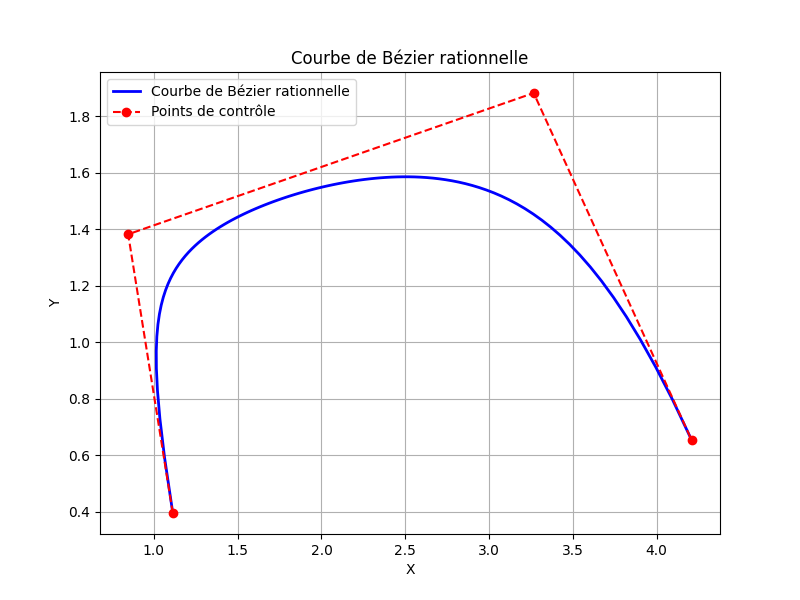

In [37]:
def TraceBezRat(Pc, L):
    """ Pc est un array numpy de dimension (2, n+1) (abscisses et ordonnées des points de contrôle) et L la liste des poids.
        La fonction ne renvoie rien mais trace la courbe de Bézier rationnelle.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Créer un vecteur de paramètres t
    t = np.linspace(0, 1, 100)

    # Calculer les points de la courbe de Bézier rationnelle
    Pts = BezierRatVect(Pc, L, t)

    # Tracer la courbe
    plt.figure(figsize=(8, 6))
    plt.plot(Pts[0, :], Pts[1, :], 'b-', linewidth=2, label='Courbe de Bézier rationnelle')

    # Tracer les points de contrôle
    plt.plot(Pc[0, :], Pc[1, :], 'ro--', label='Points de contrôle')

    plt.title('Courbe de Bézier rationnelle')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

TraceBezRat(np.array([Px,Py]),[0.5,4,3,0.7])

En appelant TraceBezRat(np.array([Px,Py]),[0.5,4,3,0.7]) Vous devriez obtenir la figure ci-dessous

<div>
<img src="BezierRat.png" width="520"/>
</div>

En déduire, en faisant quelques tests, l'effet des poids sur la courbe. Expliquer bièvement dans la cellule ci-dessous.

Votre reponse ici